In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


# **Training Data Importing into Pandas Dataframe**

In [2]:
training = pd.read_csv('/kaggle/input/facial-keypoints-detection/training.zip')
test = pd.read_csv('/kaggle/input/facial-keypoints-detection/test.zip')
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [3]:
#printing first 2 valaues of the Data
training.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [4]:
#printing the shape of the training data before and after dropping the null values
print("Before : ",training.shape)
training = training.dropna()
print("After : ",training.shape)


Before :  (7049, 31)
After :  (2140, 31)


In [5]:
#printing the shape after converting all the string data in image coloumn to numpy array
print("Before : ",type(training['Image'][0]))
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))
print("After : ",type(training['Image'][0]))

Before :  <class 'str'>
After :  <class 'numpy.ndarray'>


In [6]:
training['Image'][0].shape

(96, 96)

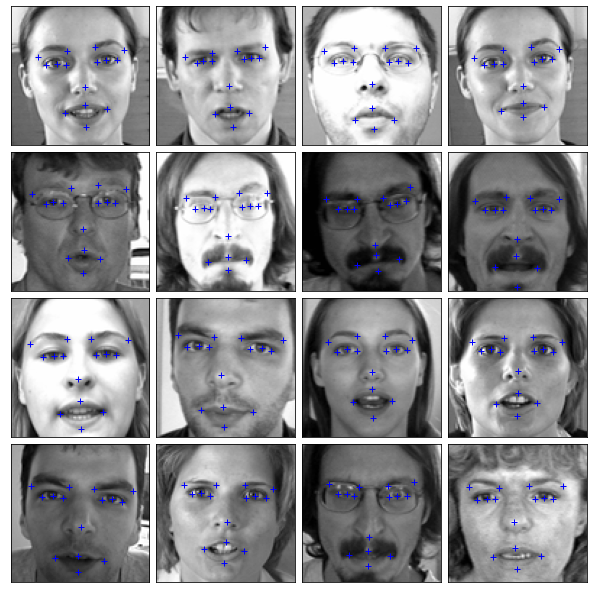

In [7]:
#using traintest split and matplot lib to plot images and the points like eye , left eybrow etc
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt

def get_image_and_dots(df, index):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'b+'))
        
    return image, l

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(training, i+20)

plt.show()

In [8]:
#reshaping the traning data for the calculation
X = np.empty((training.shape[0],96,96,1))
for x in training['Image']:
    np.append(X,np.asarray(x.reshape(96,96,1)))
X.shape

(2140, 96, 96, 1)

In [9]:
#X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)
y = training.drop(['Image'], axis=1).to_numpy()

In [10]:
y.shape

(2140, 30)

In [11]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [12]:
#divided trainign  data to 2 different parts L testing and training with 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
#importing all the required librarires for the convilution
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import MaxPooling2D, Conv2D , Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [14]:
#makign the model
model = Sequential()

# ----------------------------------------
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


# ----------------------------------------
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


# ----------------------------------------
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


# ----------------------------------------
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


# ----------------------------------------
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


# ----------------------------------------
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [15]:
#compiling the model
model.compile(optimizer='Adam', 
              loss='mse', 
              metrics=['mae'])

In [16]:
history=model.fit(X_train, y_train, epochs=500,batch_size=64, validation_split=0.05,verbose=1)

Epoch 1/500
23/23 [==============================] - 7s 80ms/step - loss: 2612.8396 - mae: 47.5399 - val_loss: 2619.5674 - val_mae: 47.5428
Epoch 2/500
23/23 [==============================] - 1s 37ms/step - loss: 2621.1200 - mae: 47.5799 - val_loss: 2617.3813 - val_mae: 47.5198
Epoch 3/500
23/23 [==============================] - 1s 37ms/step - loss: 2614.5134 - mae: 47.5343 - val_loss: 2615.1975 - val_mae: 47.4968
Epoch 4/500
23/23 [==============================] - 1s 36ms/step - loss: 2610.7983 - mae: 47.4996 - val_loss: 2613.0144 - val_mae: 47.4738
Epoch 5/500
23/23 [==============================] - 1s 38ms/step - loss: 2611.8463 - mae: 47.5012 - val_loss: 2610.8337 - val_mae: 47.4509
Epoch 6/500
23/23 [==============================] - 1s 37ms/step - loss: 2602.2731 - mae: 47.4161 - val_loss: 2608.6548 - val_mae: 47.4279
Epoch 7/500
23/23 [==============================] - 1s 37ms/step - loss: 2602.5446 - mae: 47.4146 - val_loss: 2606.4753 - val_mae: 47.4049
Epoch 8/500
23/23 [=

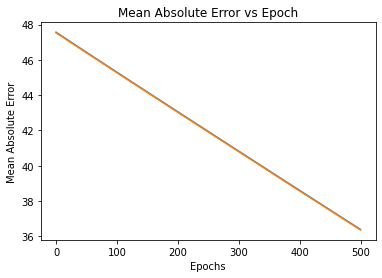

In [17]:
#plorring the graph of epochs vas MAE 
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error vs Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.show()

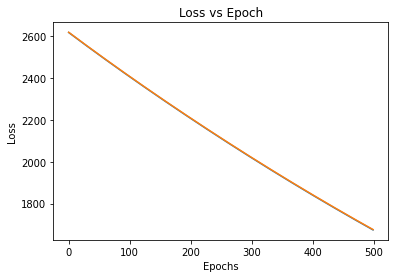

In [18]:
#plotting the graph of epochs vs loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()